In [5]:
import numpy as np
import pandas as pd
import requests
import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import accuracy_score as acc

In [6]:
url = "https://cdn.jsdelivr.net/gh/ramenfeast/BV-ethnicity-report/BV%20Dataset%20copy.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

print(df)

#%%Clean data
df = df.drop([394,395,396], axis = 0)

#%% Separate the Data and Labels
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#%% Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)
#%% Extract Ethinic group and commmunity group data
es_xtest = X_test[['Ethnic Groupa']].copy()
cs_xtest = X_test[['Community groupc ']].copy()
X_test=X_test.drop(labels= ['Ethnic Groupa', 'Community groupc '], axis=1)


es_xtrain = X_train[['Ethnic Groupa']].copy()
cs_xtrain = X_train[['Community groupc ']].copy()
X_train=X_train.drop(labels= ['Ethnic Groupa', 'Community groupc '], axis=1)

#%%Normalization

#Normalize pH
X_train['pH']=X_train['pH']/14
X_test['pH']=X_test['pH']/14

#Normalize 16s RNA data
X_train.iloc[:,1::]=X_train.iloc[:,1::]/100
X_test.iloc[:,1::]=X_test.iloc[:,1::]/100

#%%Binary y
y_train[y_train<7]=0
y_train[y_train>=7]=1

y_test[y_test<7]=0
y_test[y_test>=7]=1

    Ethnic Groupa Community groupc    pH  L. iners  L. crispatus  L. gasseri  \
0           Asian                 I  4.0       8.4          90.8         0.1   
1           White                II  4.0       0.1           0.0        88.5   
2           Black               III  4.0      74.2           0.1         0.1   
3           Asian                 I  4.7       0.0          98.7         0.0   
4           Black                IV  5.0       4.9           0.1         0.1   
..            ...               ...  ...       ...           ...         ...   
392         Asian               III  4.4      99.5           0.1         0.0   
393         Asian               III  4.4      93.4           0.0         0.0   
394           NaN               NaN  NaN       NaN           NaN         NaN   
395           NaN               NaN  NaN       NaN           NaN         NaN   
396           NaN               NaN  NaN       NaN           NaN         NaN   

     L. jensenii  Prevotella  Megasphae

In [7]:
clfrf = RandomForestClassifier().fit(X_train, y_train)

# Backward feature selection
#k_feature how many features to select
#verbose model summary each iteration
sf = sfs(clfrf,k_features=3,forward=False,scoring='accuracy')
sf.fit(X_train, y_train)

feat_names = list(sf.k_feature_names_)
print(feat_names)

['Sneathia', 'Ruminococcaceae_3', 'Arcanobacterium']


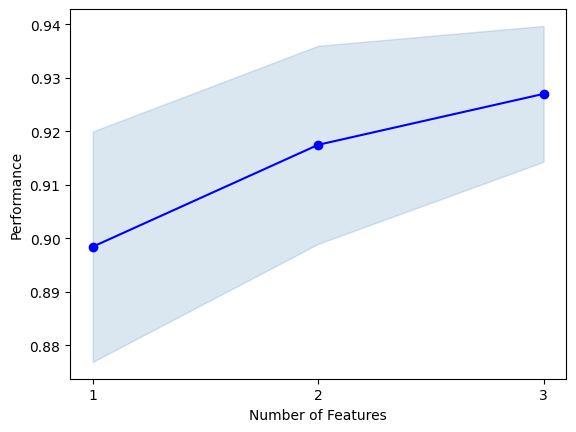

In [8]:
# Plot the model accuracy
plot_sfs(sf.get_metric_dict())
plt.show()